In [23]:
from sklearn.datasets import make_blobs, make_circles, make_moons
import numpy as np
from sklearn.preprocessing import StandardScaler 
import random
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [24]:
def generateData(n):
    np.random.seed(12046)
    blobs = make_blobs(n_samples=n, centers=[[-2, -2], [2, 2]])
    circles = make_circles(n_samples=n, factor=.4, noise=.05)
    moons = make_moons(n_samples=n, noise=.05)
    blocks = np.random.rand(n, 2) - 0.5
    y = (blocks[:, 0] * blocks[:, 1] < 0) + 0
    blocks = (blocks, y)

    scaler = StandardScaler()
    blobs = (scaler.fit_transform(blobs[0]), blobs[1])
    circles = (scaler.fit_transform(circles[0]), circles[1])
    moons = (scaler.fit_transform(moons[0]), moons[1])
    blocks = (scaler.fit_transform(blocks[0]), blocks[1])
    return blobs, circles, moons, blocks

blobs, circles, moons, blocks = generateData(1000)

In [25]:
colors = ['#FFA07A', '#7FFFAA', '#0000FF', '#FF0000']

def turncolor(x):
    y = []
    for i in range(x.shape[0]):
        if x[i] == 0:
            y.append(colors[0])
        elif x[i] == 1:
            y.append(colors[1])
        elif x[i] == 2:
            y.append(colors[2])
        elif x[i] == 3:
            y.append(colors[3])
    return y

Text(0.5, 1.0, 'blocks')

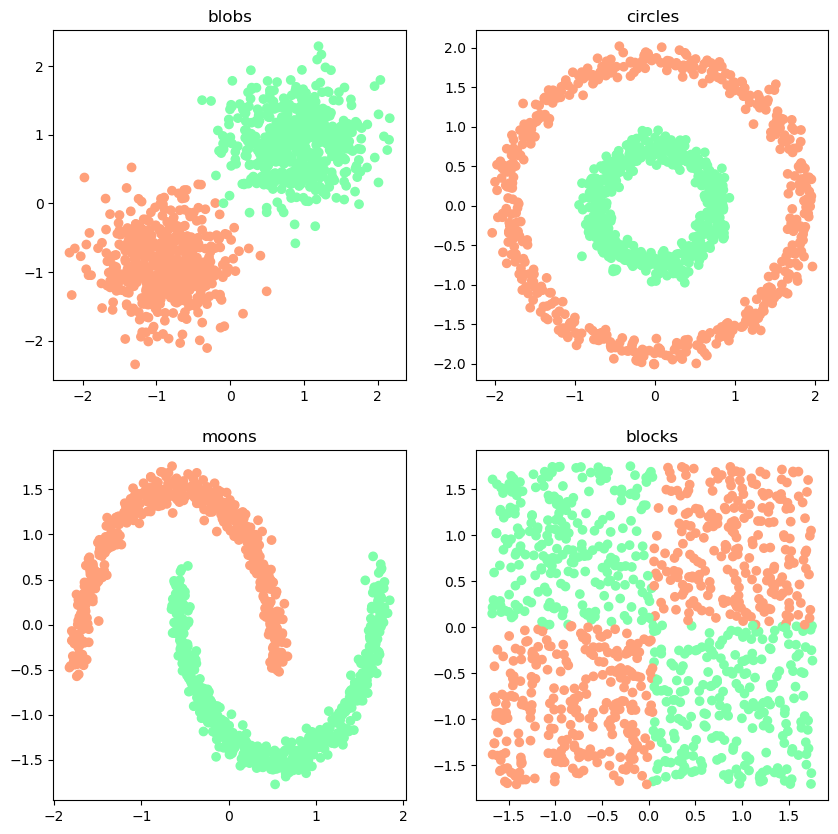

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0][0].scatter(blobs[0][:, 0], blobs[0][:, 1], c=turncolor(blobs[1]))
axes[0][0].set_title("blobs")
axes[0][1].scatter(circles[0][:, 0], circles[0][:, 1], c=turncolor(circles[1]))
axes[0][1].set_title("circles")
axes[1][0].scatter(moons[0][:, 0], moons[0][:, 1], c=turncolor(moons[1]))
axes[1][0].set_title("moons")
axes[1][1].scatter(blocks[0][:, 0], blocks[0][:, 1], c=turncolor(blocks[1]))
axes[1][1].set_title("blocks")

In [27]:
#develop four decision trees
dta=tree.DecisionTreeClassifier(criterion='entropy',random_state=30,max_features=2,max_depth=4)
dtb=tree.DecisionTreeClassifier(criterion='entropy',random_state=60,max_features=2,max_depth=4)
dtc=tree.DecisionTreeClassifier(criterion='gini',random_state=90,max_features=2,max_depth=6)
dtd=tree.DecisionTreeClassifier(criterion='entropy',random_state=120,max_features=2,max_depth=4)

In [28]:
#import training data, return resulting data, including prediction mark, results, training data, testing data and prediction lables
def train(data, dt):
    x, y = data[0], data[1]
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)
    dt = dt.fit(xtrain, ytrain)
    score = dt.score(xtest, ytest)
    result = dt.predict(xtest)
    result0 = result.copy()
    zero21 = ((result != ytest) & (result != np.zeros(result.shape[0])))

    for i in range(result.shape[0]):
        if zero21[i]:
            result0[i] = 2
    one20 = ((result != ytest) & (result == np.zeros(result.shape[0])))
    for i in range(result.shape[0]):
        if one20[i]:
            result0[i] = 3

    ret_x = np.vstack((xtrain, xtest))
    ret_y = np.concatenate((ytrain, result0))
    return score, (ret_x, ret_y), (xtrain, ytrain), (xtest, result0), (xtest, ytest)

#store data
score_a, a, atrain, apre, atest = train(blobs, dta)
score_b, b, btrain, bpre, btest = train(circles, dtb)
score_c, c, ctrain, cpre, ctest = train(moons, dtc)
score_d, d, dtrain, dpre, dtest = train(blocks, dtd)

In [29]:
def figureplot(a, b, c, d, dta, dtb, dtc, dtd):
    figure, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
    #calculate the margins
    x_min, x_max = a[0][:, 0].min() - 0.25, a[0][:, 0].max() + 0.25
    y_min, y_max = a[0][:, 1].min() - 0.25, a[0][:, 1].max() + 0.25
    h = 0.02
    #draw the margins
    dta=dta.fit(atrain[0],atrain[1])
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = dta.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFA07A','#7FFFAA'])
    axes[0][0].pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    #calculate the margins
    x_min, x_max = b[0][:, 0].min() - 0.25, b[0][:, 0].max() + 0.25
    y_min, y_max = b[0][:, 1].min() - 0.25, b[0][:, 1].max() + 0.25
    h = 0.02
    #draw the margins
    dtb=dtb.fit(btrain[0],btrain[1])
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = dtb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFA07A','#7FFFAA'])
    axes[0][1].pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    #calculate the margins
    x_min, x_max = c[0][:, 0].min() - 0.25, c[0][:, 0].max() + 0.25
    y_min, y_max = c[0][:, 1].min() - 0.25, c[0][:, 1].max() + 0.25
    h = 0.02
    #draw the margins
    dtc=dtc.fit(ctrain[0],ctrain[1])
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFA07A','#7FFFAA'])
    axes[1][0].pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    #calculate the margins
    x_min, x_max = d[0][:, 0].min() - 0.25, d[0][:, 0].max() + 0.25
    y_min, y_max = d[0][:, 1].min() - 0.25, d[0][:, 1].max() + 0.25
    h = 0.02
   #draw the margins
    dtd=dtd.fit(dtrain[0],dtrain[1])
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = dtd.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFA07A','#7FFFAA'])
    axes[1][1].pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    axes[0][0].scatter(a[0][:,0],a[0][:,1],c=turncolor(a[1]))
    axes[0][0].set_title("the accuracy is {}".format(score_a))
    axes[0][1].scatter(b[0][:,0],b[0][:,1],c=turncolor(b[1]))
    axes[0][1].set_title("the accuracy is {}".format(score_b))
    axes[1][0].scatter(c[0][:,0],c[0][:,1],c=turncolor(c[1]))
    axes[1][0].set_title("the accuracy is {}".format(score_c))
    axes[1][1].scatter(d[0][:,0],d[0][:,1],c=turncolor(d[1]))
    axes[1][1].set_title("the accuracy is {}".format(score_d))
    
    plt.savefig("test.png")
    plt.show()

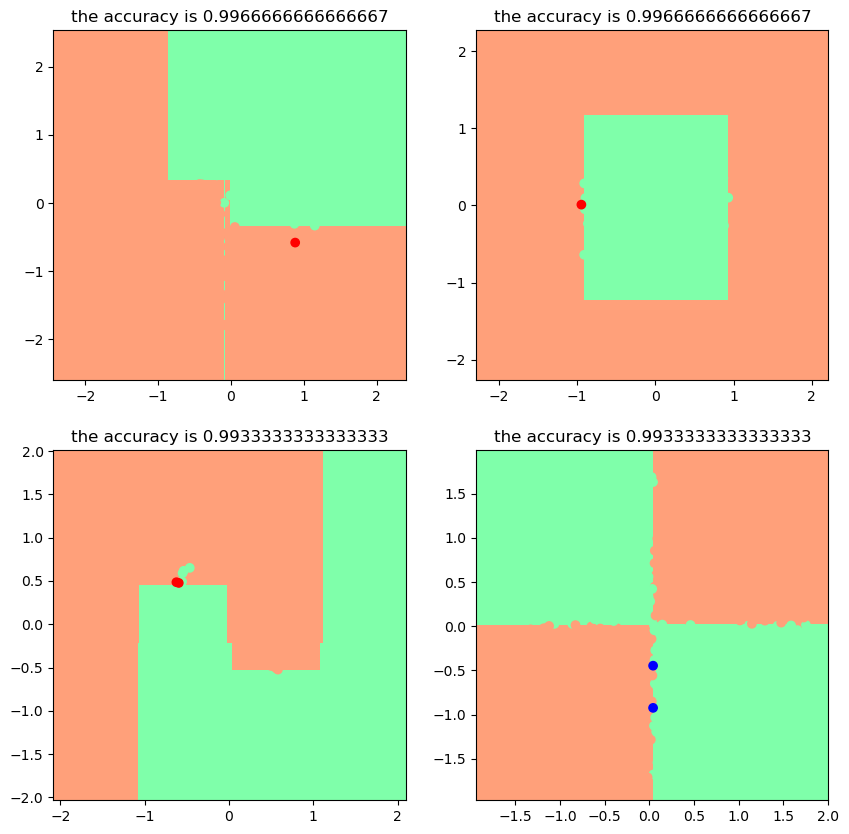

In [30]:
figureplot(a, b, c, d, dta, dtb, dtc, dtd)